# Make requests to the Best Buy API

https://bestbuyapis.github.io/api-documentation/

https://developer.bestbuy.com/secure/dashboard

In [182]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import requests
session = requests.Session()

In [2]:
# Load the API key
with open("./.bestbuy_api_key.txt") as fi:
    api_key = fi.read().split(": ", 1)[-1].strip()

In [ ]:
url = f"https://api.bestbuy.com/v1/products(search=flat&search=screen&search=tv)?format=json&show=sku,name,salePrice&apiKey={api_key}"
url = f"https://api.bestbuy.com/v1/products(search=flat%20screen%20tv)?format=json&page=1&pageSize=100&apiKey={api_key}"
url = f'https://api.bestbuy.com/v1/products(categoryPath.name="All%20Flat-Panel%20TVs")?format=json&show=sku,name,salePrice&apiKey={api_key}'

# Search for flat screen 4K TVs

In [69]:
f"https://api.bestbuy.com/v1/products((search=4k)&(categoryPath.id=abcat0101000))?apiKey={api_key}&sort=name.asc&show=name&pageSize=100&format=json"

'https://api.bestbuy.com/v1/products((search=4k)&(categoryPath.id=abcat0101000))?apiKey=ovcAukjfZArzRBqHEdLBSJ1W&sort=name.asc&show=name&pageSize=100&format=json'

In [70]:
def assemble_request(search_term, **kwargs):   
    s = ""
    for key, value in params.items():
        s += f"&{key}={value}"
    url = f"https://api.bestbuy.com/v1/products((search={search_term.replace(' ', '%20')})&(categoryPath.id=abcat0101000))?apiKey={api_key}&format=json" + s
    return url

In [183]:
fields = 'name,regularPrice,screenSizeIn,sku'
products = pd.DataFrame(columns=fields.split(','))
search_term = "4K"
for page_num in range(1, 20):
    params = {'page': page_num,
              'pageSize': 50,
              'show': fields}
    url = assemble_request(search_term, **params)

    # Make the request
    r = session.get(url)
    assert r.status_code == 200, f"Bad response: {r.status_code}"
    tmp = pd.DataFrame(r.json()['products'])
    print(f"Found {len(tmp)} product results")
    if not len(tmp):
        break
    products = pd.concat([products, tmp])
    time.sleep(5)
products.drop_duplicates(subset=['sku'], inplace=True)

Found 50 product results
Found 50 product results
Found 50 product results
Found 20 product results
Found 0 product results


In [172]:
products.to_json("4k_tv_prices.json", orient='records')
products.to_pickle("4k_tv_prices.pickle")

In [185]:
products.tail()

,name,regularPrice,screenSizeIn,sku
15,Toshiba - 55” Class – LED - 2160p – Smart - 4K...,449.99,54.6,6194911
16,Insignia™ - 43” Class – LED - 2160p – Smart - ...,299.99,42.5,6245701
17,Insignia™ - 50” Class – LED - 2160p – Smart - ...,349.99,49.5,6245704
18,Insignia™ - 55” Class – LED - 2160p – Smart - ...,429.99,54.5,6245800
19,"VIZIO - 65"" Class - LED - E-Series - 2160p - S...",699.99,64.5,5608905


In [186]:
products.shape

(170, 4)

In [220]:
import numpy as np

In [221]:
products['price_in_thousands'] = products.regularPrice / 1e3
products['price_log'] = np.log(products.regularPrice)

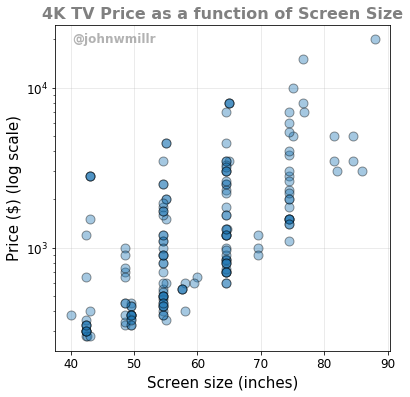

In [301]:
products.plot(y='regularPrice', x='screenSizeIn', style='o', ms=9, alpha=0.4, fontsize=12,
              figsize=(6, 6), legend=False, markeredgecolor='k',
              logy=True)
plt.xlabel("Screen size (inches)", fontsize=15)
plt.ylabel("Price ($) (log scale)", fontsize=15)
plt.title("4K TV Price as a function of Screen Size", fontsize=16, color="gray", weight="heavy", loc='center')
plt.grid(True, axis='both', alpha=0.3)
plt.text(40.3, 19.2e3, "@johnwmillr", ha="left", fontsize=12, color='gray', weight='heavy', alpha=0.6)
plt.savefig("./price_vs_size_logy.png", dpi=300, bbox_inches='tight')